In [81]:
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.utils import shuffle

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

import glob
import os

In [82]:
#Some styling
pd.options.display.float_format = '{:.1f}'.format
sns.set()
plt.style.use('ggplot')

#Label encoder used to get a numeric representation of a label
le = preprocessing.LabelEncoder()

#The activities
LABELS = ['standing',
          'walking-natural',
          'walking-rider',
          'trotting-natural',
          'trotting-rider',
          'running-natural',
          'running-rider',
          'jumping',
          'grazing',
          'eating',
          'head shake',
          'shaking',
          'scratch-biting',
          'rubbing',
          'fighting',
          'rolling',
          'scared']

#Sliding windows
TIME_PERIODS = 200
STEP_DISTANCE = 100

#Datasets
FILES = sorted(glob.glob('Data/*'))

# Set up dataframe

In [85]:
REMOVE_COLUMNS = ['Mx', 'My', 'Mz','A3D','G3D','M3D'] #Add columns to drop from dataframe

def loadDataFrame(files):
    """
    Simple function to set up dataframe and initial clean-up of the data
    files: path to files
    returns: combined dataframe of all files
    """
    df = pd.DataFrame()
    for file in files:
        csv = pd.read_csv(file)
        csv['filename']=file
        df = df.append(csv)
        
    df.drop(REMOVE_COLUMNS, axis=1, inplace=True)
    df['ActivityEncoded'] = le.fit_transform(df['label'].values.ravel())

    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan


df = loadDataFrame(FILES)

# Plot data composition

In [86]:
def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

show_basic_dataframe_info(df)
df.head(20)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 10763567



,Ax,Ay,Az,Gx,Gy,Gz,datetime,label,segment,filename,ActivityEncoded
0,6.5,-1.2,3.3,-12.8,54.2,-3.4,2018-06-14 20:06:48.0988,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
1,6.6,-0.5,3.2,1.7,58.2,-6.8,2018-06-14 20:06:48.1088,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
2,6.7,0.8,3.5,26.2,60.6,-8.1,2018-06-14 20:06:48.1188,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
3,6.8,2.1,3.8,48.7,58.9,-8.8,2018-06-14 20:06:48.1288,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
4,6.8,3.2,4.2,60.0,55.4,-9.1,2018-06-14 20:06:48.1388,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
5,6.8,3.9,4.7,60.2,50.0,-8.2,2018-06-14 20:06:48.1488,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
6,6.7,3.5,5.3,50.8,44.5,-6.9,2018-06-14 20:06:48.1588,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
7,7.2,2.6,5.1,31.4,42.3,-4.8,2018-06-14 20:06:48.1688,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
8,7.6,1.6,4.3,2.9,43.5,-2.3,2018-06-14 20:06:48.1788,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16
9,7.7,0.8,4.0,-18.1,48.6,1.5,2018-06-14 20:06:48.1888,walking-natural,13935,Data/subject_11_Patron_part_1.csv,16


# Plotting activit#Training examples per activity type
#df['label'].value_counts().plot(kind='bar', title='Training Examples by Activity Type')
#plt.show()

SECONDS = 10 #nr of seconds to display accelerometer data
SAMPLING_RATE = 20 #the sampling rate at which data was recorded

def plot_activity(activity, data):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
    l1, = ax[0].plot(data['datetime'], data['Ax'], label="X-axis")
    l2, = ax[0].plot(data['datetime'], data['Ay'], label="Y-Axis")
    l3, = ax[0].plot(data['datetime'], data['Az'], label="Z-Axis")
    ax[0].set_ylabel('Accelerometer measurement')
    ax[0].set_xlabel('Time')
    ax[0].legend(handles=[l1,l2,l3], loc='lower right')
    ax[0].xaxis.set_ticks([])
    ax[0].set_title(activity+" accelerometer data")
    ax[0].grid(False)
    
    l1, = ax[1].plot(data['datetime'], data['Gx'], label="X-axis")
    l2, = ax[1].plot(data['datetime'], data['Gy'], label="Y-Axis")
    l3, = ax[1].plot(data['datetime'], data['Gz'], label="Z-Axis")
    ax[1].set_ylabel('Gyroscope measurement')
    ax[1].set_xlabel('Time')
    ax[1].legend(handles=[l1,l2,l3], loc='lower right')
    ax[1].xaxis.set_ticks([])
    ax[1].set_title(activity+" gyroscope data")
    ax[1].grid(False)
    
    plt.show()

#plot all 3 subplots for each activity
for activity in np.unique(df['label']):
    subset = df[df['label'] == activity][:SECONDS*SAMPLING_RATE] 
    plot_activity(activity, subset)y data

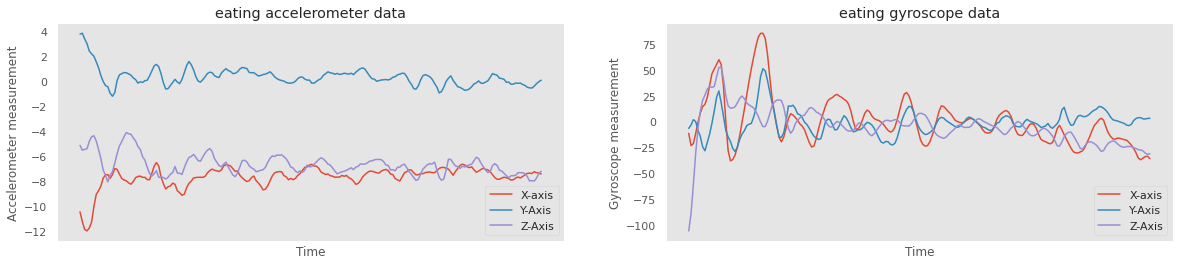

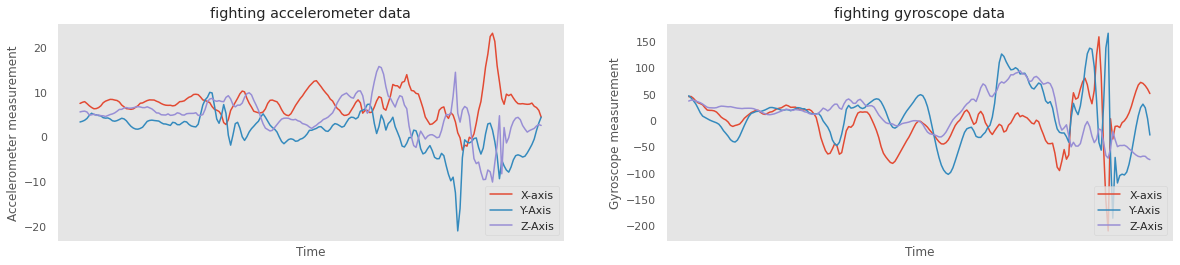

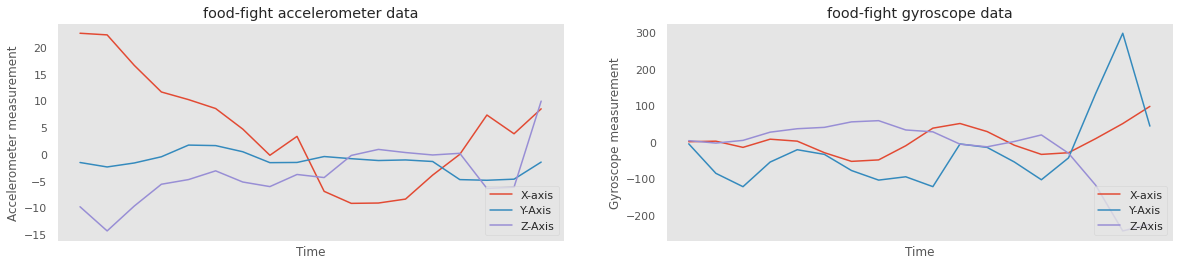

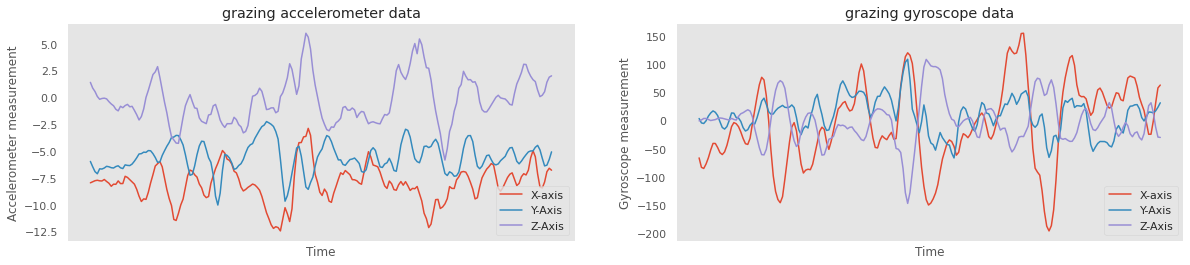

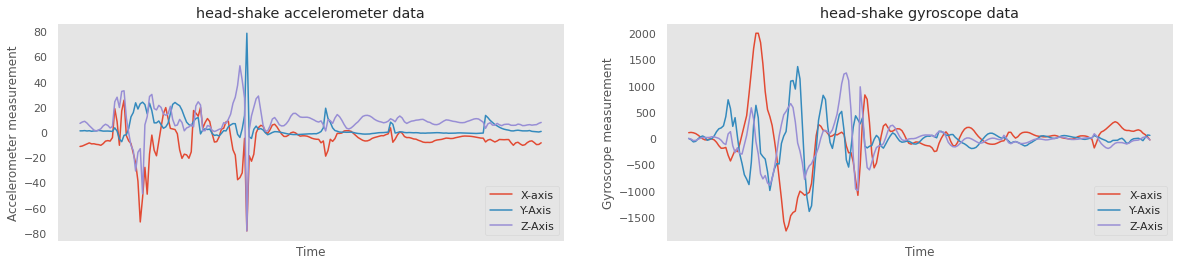

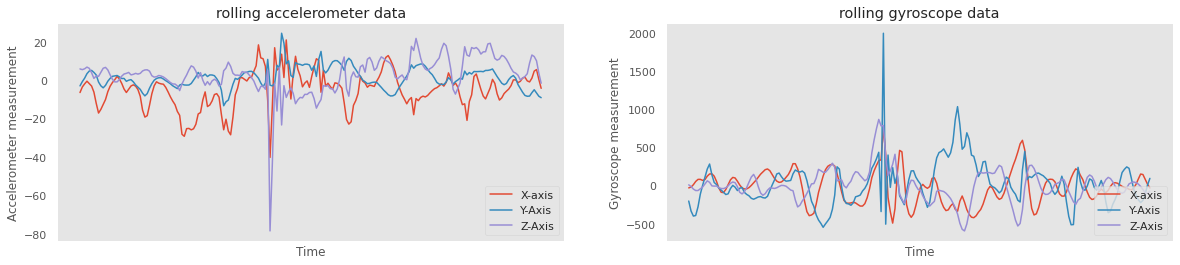

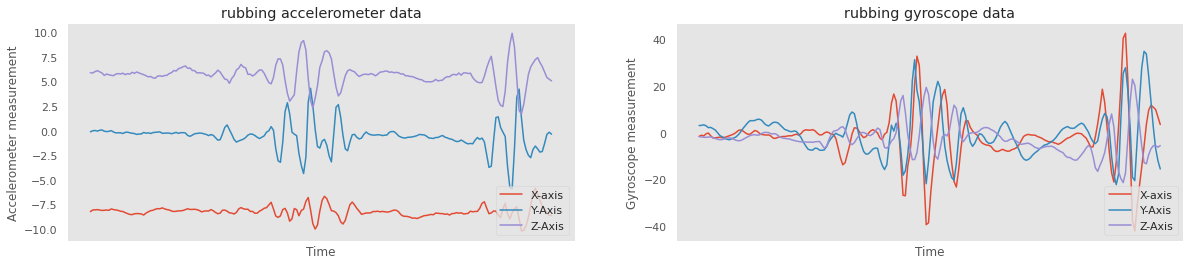

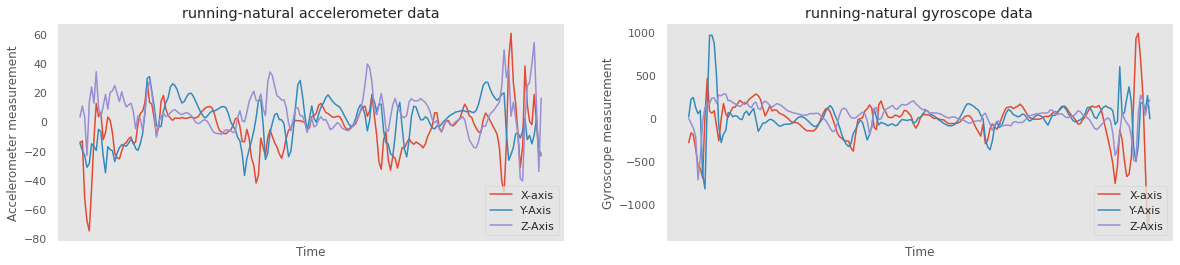

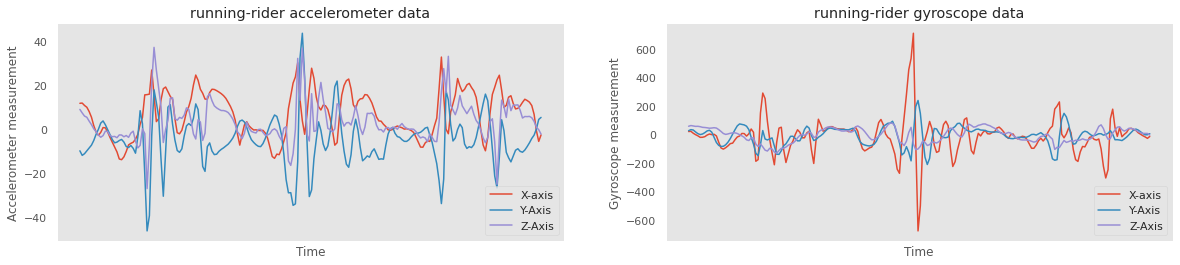

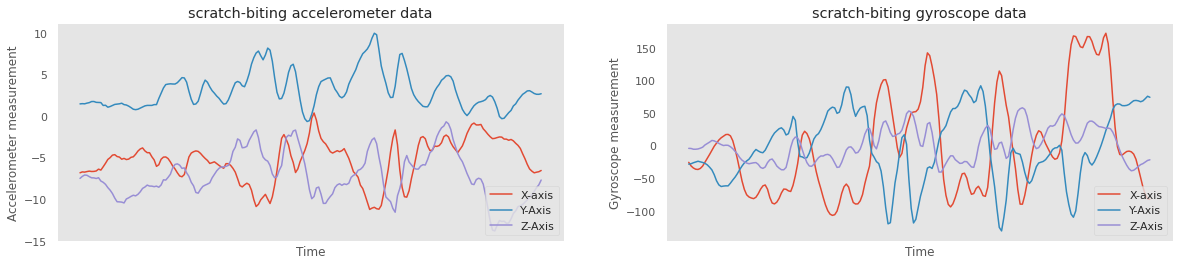

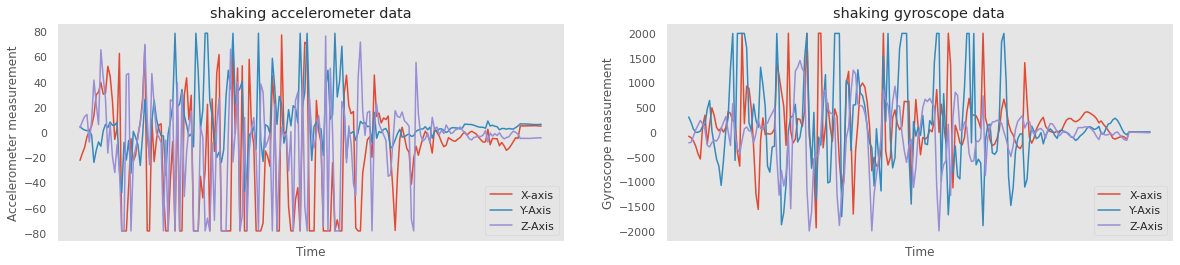

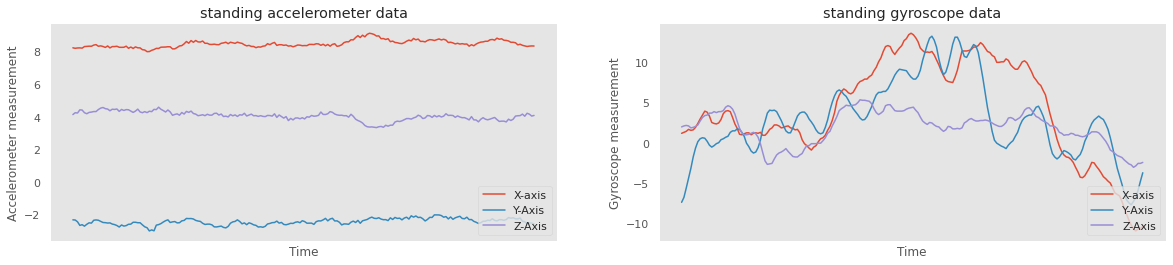

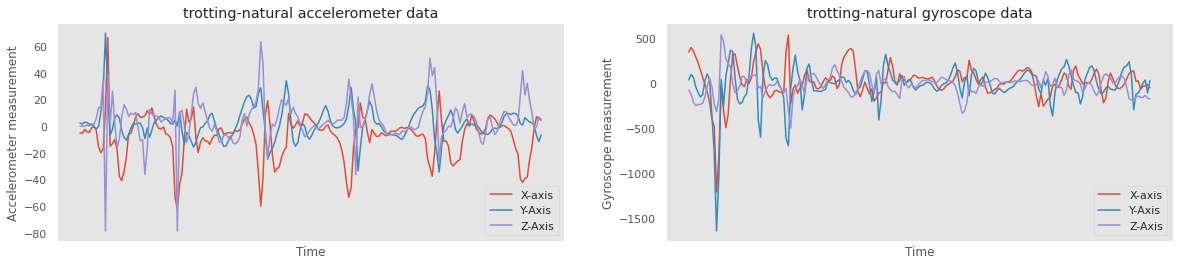

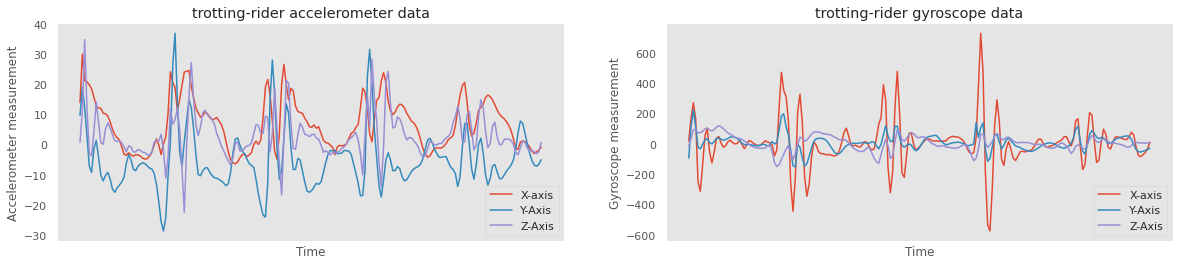

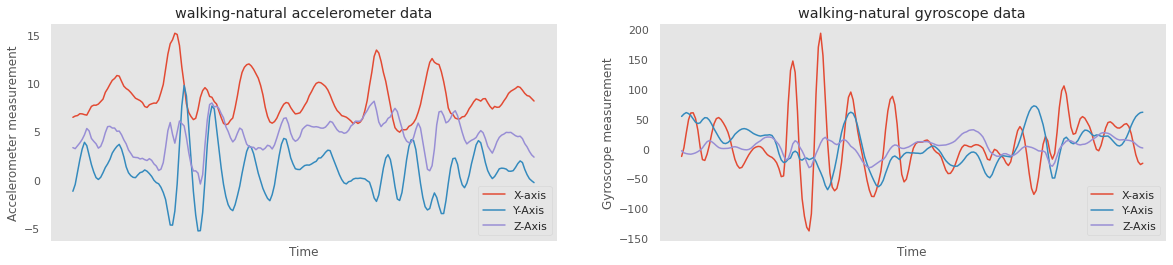

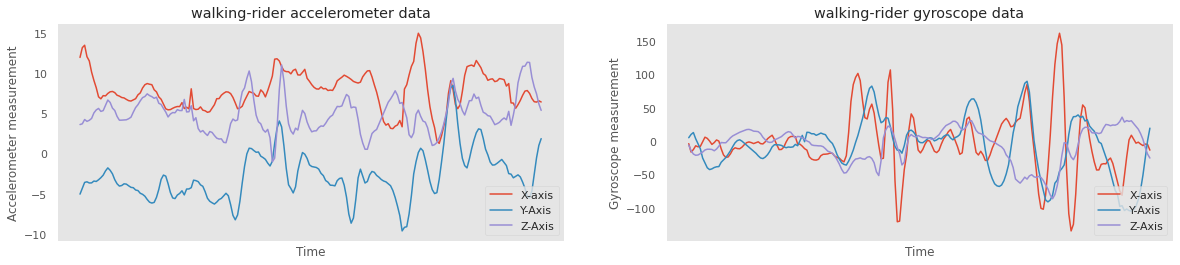

In [110]:
#Training examples per activity type
SECONDS = 10 #nr of seconds to display accelerometer data
SAMPLING_RATE = 20 #the sampling rate at which data was recorded

def plot_activity(activity, data):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
    l1, = ax[0].plot(data['datetime'], data['Ax'], label="X-axis")
    l2, = ax[0].plot(data['datetime'], data['Ay'], label="Y-Axis")
    l3, = ax[0].plot(data['datetime'], data['Az'], label="Z-Axis")
    ax[0].set_ylabel('Accelerometer measurement')
    ax[0].set_xlabel('Time')
    ax[0].legend(handles=[l1,l2,l3], loc='lower right')
    ax[0].xaxis.set_ticks([])
    ax[0].set_title(activity+" accelerometer data")
    ax[0].grid(False)
    
    l1, = ax[1].plot(data['datetime'], data['Gx'], label="X-axis")
    l2, = ax[1].plot(data['datetime'], data['Gy'], label="Y-Axis")
    l3, = ax[1].plot(data['datetime'], data['Gz'], label="Z-Axis")
    ax[1].set_ylabel('Gyroscope measurement')
    ax[1].set_xlabel('Time')
    ax[1].legend(handles=[l1,l2,l3], loc='lower right')
    ax[1].xaxis.set_ticks([])
    ax[1].set_title(activity+" gyroscope data")
    ax[1].grid(False)
    
    plt.show()

#plot all 3 subplots for each activity
for activity in np.unique(df['label']):
    subset = df[df['label'] == activity][:SECONDS*SAMPLING_RATE] 
    plot_activity(activity, subset)

# Encoding the labels to integers

In [88]:
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df[LABEL] = le.fit_transform(df['label'].values.ravel())

# Get only relevant subjects

In [89]:
#These are the indexes of the relevant subjects, see FILES
indexes = [0,1,2,7,8,9,13,14,15,16,17]
subjects = [FILES[x] for x in indexes]

#new dataframe with only the horses in subjects
df = df[df['filename'].isin(subjects)]

#Might need to add Viva later on again?
subject_names = ['Galoway', 'Patron', 'Happy', 'Driekus']

# Splitting in test and train

In [91]:
'''
  Function to split train and test data by subject
  df = dataframe
  name = subject to put in test subset
  '''
def splitBySubject(name):
    print(name)
    test = df[df['filename'].str.contains(name)]
    train = df[~df['filename'].str.contains(name)]
    return train, test

# Feature scaling

In [92]:
def featureScaling(data):
    train_x_max = data['Ax'].max()
    train_y_max = data['Ay'].max()
    train_z_max = data['Az'].max()

    train_gx_max = data['Gx'].max()
    train_gy_max = data['Gy'].max()
    train_gz_max = data['Gz'].max()

    pd.options.mode.chained_assignment = None

    #divide all 3 axis with the max value in the training set
    data['Ax'] = data['Ax'] / train_x_max
    data['Ay'] = data['Ay'] / train_y_max
    data['Az'] = data['Az'] / train_z_max

    data['Gx'] = data['Ax'] / train_gx_max
    data['Gy'] = data['Ay'] / train_gy_max
    data['Gz'] = data['Az'] / train_gz_max

    data = data.round({'Ax': 4, 'Ay': 4, 'Az': 4, 'Gx':4, 'Gy':4, 'Gz':4})
    return data

# Windowing

In [93]:
def createWindows(df, time_steps, step, label_name):
    N_FEATURES = 6
    windows = []
    labels = []
    for i in range(0, len(df)-time_steps, step):
        axs = df['Ax'].values[i: i + time_steps]
        ays = df['Ay'].values[i: i + time_steps]
        azs = df['Az'].values[i: i + time_steps]

        gxs = df['Gx'].values[i: i + time_steps]
        gys = df['Gy'].values[i: i + time_steps]
        gzs = df['Gz'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        windows.append([axs, ays, azs, gxs, gys, gzs])
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_windows = np.asarray(windows, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_windows, labels

# Reshaping data

In [96]:
# reshaping one dimentional xtrain into fitted data for the classifier
def inputShape(data):
    data = data.reshape(data.shape[0], input_shape)
    return data

# OneHotCoding the labels

In [98]:
# Applying one hot coding to y_train
def oneHotCoding(data):
    y_train_hot = np_utils.to_categorical(data, num_classes)
    return y_train_hot

# Classifier

In [99]:
def classifierModel():
    model_m = Sequential()
    # Remark: since coreml cannot accept vector shapes of complex shape like
    # [80,3] this workaround is used in order to reshape the vector internally
    # prior feeding it into the network
    model_m.add(Reshape((TIME_PERIODS, 6), input_shape=(input_shape,)))
    model_m.add(Dense(100, activation='relu'))
    model_m.add(Dense(100, activation='relu'))
    model_m.add(Dense(100, activation='relu'))
    model_m.add(Flatten())
    model_m.add(Dense(num_classes, activation='softmax'))
    return model_m
# print(model_m.summary())

In [108]:
# takes x_train and y_train_hot
def classifier(xdata, ydata):
    modelm = classifierModel()

    callbacks_list = [
        keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
    ]

    modelm.compile(loss='categorical_crossentropy',
                    optimizer='adam', metrics=['accuracy'])

    # Hyper-parameters
    BATCH_SIZE = 600
    EPOCHS = 20

    # Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
    history = modelm.fit(xdata,
                          ydata,
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          callbacks=callbacks_list,
                          validation_split=0.2,
                          verbose=1)
    return history, modelm

In [101]:
def printResults(history, modelm, x_train, y_train):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
    plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
    plt.plot(history.history['loss'], 'r--', label='Loss of training data')
    plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Training Epoch')
    plt.ylim(0)
    plt.legend()
    plt.show()

    # Print confusion matrix for training data
    y_pred_train = modelm.predict(x_train)
    # Take the class with the highest probability from the train predictions
    max_y_pred_train = np.argmax(y_pred_train, axis=1)
    print(classification_report(y_train, max_y_pred_train))

In [102]:
def testValidation(test, modelm):
    # Normalize features for training data set
    test['Ax'] = test['Ax'] / test['Ax'].max()
    test['Ay'] = test['Ay'] / test['Ay'].max()
    test['Az'] = test['Az'] / test['Az'].max()

    test['Gx'] = test['Gx'] / test['Gx'].max()
    test['Gy'] = test['Gy'] / test['Gy'].max()
    test['Gz'] = test['Gz'] / test['Gz'].max()

    df_test = test.round({'Ax': 4, 'Ay': 4, 'Az': 4, 'Gx':4, 'Gy':4, 'Gz':4})

    x_test, y_test = createWindows(df_test,
                                   TIME_PERIODS,
                                   STEP_DISTANCE,
                                   LABEL)
    
    # Set input_shape / reshape for Keras
    x_test = x_test.reshape(x_test.shape[0], input_shape)

    x_test = x_test.astype('float32')
    y_test = y_test.astype('float32')

    y_test = np_utils.to_categorical(y_test, num_classes)
    score = modelm.evaluate(x_test, y_test, verbose=1)
    
    print('\nAccuracy on test data: %0.2f' % score[1])
    print('\nLoss on test data: %0.2f' % score[0])
    return x_test, y_test

In [103]:
def show_confusion_matrix(validations, predictions, model_m):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    y_pred_test = model_m.predict(x_test)
    # Take the class with the highest probability from the test predictions
    max_y_pred_test = np.argmax(y_pred_test, axis=1)
    max_y_test = np.argmax(y_test, axis=1)

    print(classification_report(max_y_test, max_y_pred_test))

# Loop of training with all subjects

Galoway
data split
normalization
windows
y_train:
[16 16 16 ... 16 16 16]
y_train: 
[17  3 15 ... 17  3 15]
values
fitted values
Epoch 1/20
81/81 [==============================] - 8s 79ms/step - loss: 1.5207 - accuracy: 0.5853 - val_loss: 0.4047 - val_accuracy: 0.8904
Epoch 2/20
81/81 [==============================] - 4s 54ms/step - loss: 0.3582 - accuracy: 0.9032 - val_loss: 0.2978 - val_accuracy: 0.9204
Epoch 3/20
81/81 [==============================] - 4s 53ms/step - loss: 0.2944 - accuracy: 0.9183 - val_loss: 0.2747 - val_accuracy: 0.9276
Epoch 4/20
81/81 [==============================] - 4s 53ms/step - loss: 0.2541 - accuracy: 0.9288 - val_loss: 0.2651 - val_accuracy: 0.9304
Epoch 5/20
81/81 [==============================] - 4s 53ms/step - loss: 0.2396 - accuracy: 0.9322 - val_loss: 0.2657 - val_accuracy: 0.9296
Epoch 6/20
81/81 [==============================] - 4s 53ms/step - loss: 0.2307 - accuracy: 0.9339 - val_loss: 0.2514 - val_accuracy: 0.9354
Epoch 7/20
81/81 [=======

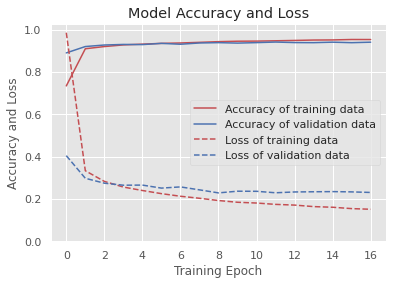

              precision    recall  f1-score   support

         0.0       0.88      0.38      0.54        39
         3.0       0.95      0.96      0.96     12268
         4.0       0.94      0.82      0.88       707
         6.0       0.98      0.84      0.91        63
         7.0       0.75      0.75      0.75         8
         8.0       0.93      0.80      0.86        81
         9.0       0.96      0.90      0.93      2299
        11.0       1.00      0.10      0.18        62
        12.0       0.82      0.56      0.67        32
        13.0       0.97      0.97      0.97      3528
        14.0       0.97      0.89      0.93        37
        15.0       0.98      0.98      0.98     17048
        16.0       0.61      0.54      0.57      2136
        17.0       0.96      0.98      0.97     22022

    accuracy                           0.95     60330
   macro avg       0.91      0.75      0.79     60330
weighted avg       0.95      0.95      0.95     60330

plotting
892/892 [=======

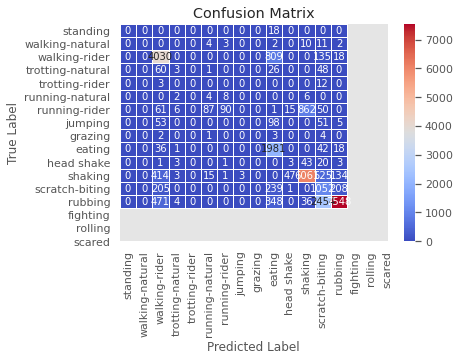

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        32
           3       0.76      0.81      0.78      4992
           4       0.14      0.02      0.04       138
           6       0.00      0.00      0.00        15
           8       0.04      0.20      0.06        20
           9       0.87      0.08      0.14      1172
          11       0.00      0.00      0.00       207
          12       0.00      0.00      0.00        10
          13       0.56      0.95      0.71      2078
          14       0.05      0.04      0.04        74
          15       0.86      0.84      0.85      7203
          16       0.24      0.62      0.34      1705
          17       0.95      0.69      0.80     10861

    accuracy                           0.73     28525
   macro avg       0.32      0.30      0.27     28525
weighted avg       0.80      0.73      0.74     28525

Patron
data split
normali

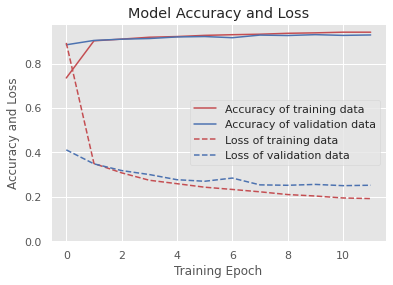

              precision    recall  f1-score   support

         0.0       1.00      0.09      0.16        56
         1.0       0.92      0.35      0.51        31
         3.0       0.92      0.98      0.95     15014
         4.0       0.95      0.71      0.81       739
         6.0       0.89      0.76      0.82        41
         7.0       1.00      0.57      0.73         7
         8.0       0.98      0.43      0.59        96
         9.0       0.96      0.86      0.91      2652
        11.0       0.76      0.17      0.27       269
        12.0       0.85      0.54      0.66        41
        13.0       0.91      0.94      0.93      4171
        14.0       0.93      0.32      0.47        85
        15.0       0.96      0.98      0.97     20387
        16.0       0.73      0.49      0.58      3389
        17.0       0.95      0.97      0.96     27034

    accuracy                           0.94     74012
   macro avg       0.91      0.61      0.69     74012
weighted avg       0.94   

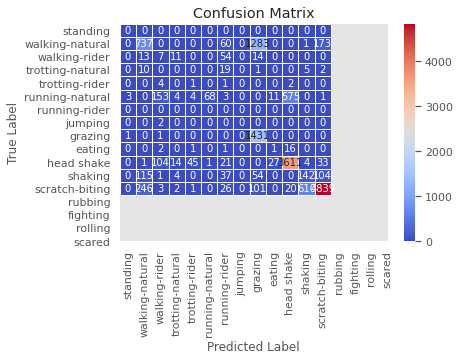

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.66      0.33      0.44      2254
           4       0.03      0.07      0.04        99
           6       0.00      0.00      0.00        37
           8       0.02      0.12      0.03         8
           9       0.99      0.08      0.15       822
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.50      1.00      0.66      1433
          14       0.03      0.05      0.03        21
          15       0.85      0.94      0.89      3861
          16       0.19      0.31      0.23       457
          17       0.94      0.83      0.88      5848

    accuracy                           0.73     14842
   macro avg       0.32      0.29      0.26     14842
weighted avg       0.80      0.73      0.73     14842

Happy
data split
normalization
windows
y_train:
[16 16 16 ... 16 16 16]
y_train

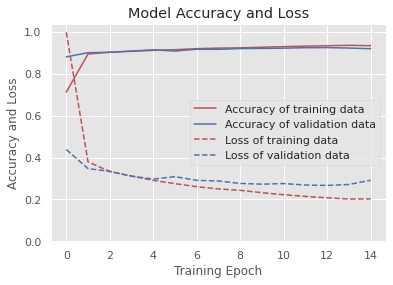

              precision    recall  f1-score   support

         0.0       0.50      0.04      0.07        56
         1.0       0.92      0.36      0.52        33
         3.0       0.93      0.95      0.94     11401
         4.0       0.94      0.78      0.85       390
         6.0       0.91      0.78      0.84        78
         7.0       1.00      0.25      0.40         8
         8.0       0.95      0.57      0.71        92
         9.0       0.93      0.95      0.94      2680
        11.0       0.80      0.18      0.30       257
        12.0       0.96      0.51      0.67        43
        13.0       0.95      0.92      0.94      4212
        14.0       0.91      0.50      0.65       101
        15.0       0.97      0.98      0.97     16323
        16.0       0.68      0.30      0.42      2936
        17.0       0.92      0.99      0.95     22859

    accuracy                           0.93     61469
   macro avg       0.88      0.61      0.68     61469
weighted avg       0.92   

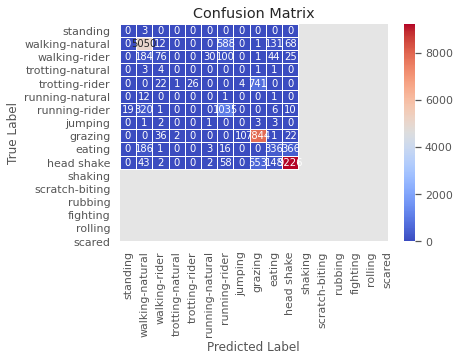

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           3       0.87      0.86      0.87      5850
           4       0.49      0.17      0.25       460
           8       0.00      0.00      0.00         9
           9       1.00      0.03      0.06       794
          11       0.00      0.00      0.00        14
          13       0.58      0.74      0.65      1391
          14       0.00      0.00      0.00        10
          15       0.86      0.99      0.92      7915
          16       0.50      0.37      0.43       908
          17       0.95      0.92      0.93     10032

    accuracy                           0.86     27386
   macro avg       0.48      0.37      0.37     27386
weighted avg       0.86      0.86      0.85     27386

Driekus
data split
normalization
windows
y_train:
[16 16 16 ... 16 16 16]
y_train: 
[ 9 13 17 ... 17 17 17]
values
fitted values
Epoch 1/20
103/103 [==============================] - 8s 6

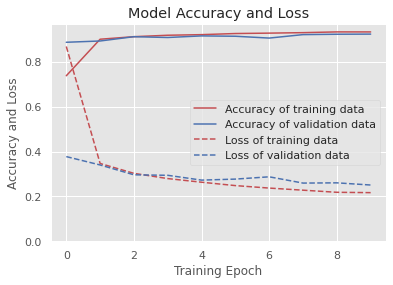

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.89      0.52      0.65        33
         3.0       0.93      0.96      0.94     14381
         4.0       0.92      0.75      0.83       688
         6.0       0.95      0.67      0.79        52
         7.0       1.00      0.50      0.67         8
         8.0       0.90      0.60      0.72        86
         9.0       0.91      0.89      0.90      3115
        11.0       0.80      0.15      0.25       254
        12.0       1.00      0.46      0.63        35
        13.0       0.95      0.93      0.94      5204
        14.0       0.90      0.25      0.39       103
        15.0       0.98      0.97      0.97     21225
        16.0       0.68      0.42      0.52      3522
        17.0       0.93      0.98      0.96     28275

    accuracy                           0.93     77003
   macro avg       0.85      0.60      0.68     77003
weighted avg       0.93   

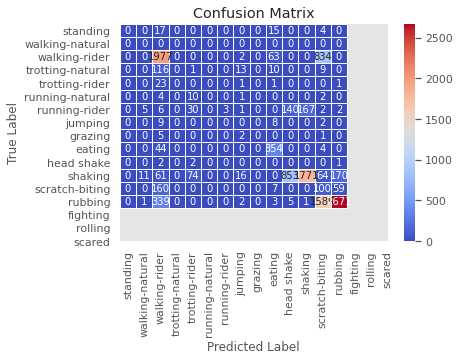

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00         0
           3       0.72      0.69      0.70      2876
           4       0.00      0.00      0.00       149
           6       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        17
           9       1.00      0.01      0.02       356
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00         8
          13       0.77      0.88      0.82       402
          14       0.00      0.00      0.00         5
          15       0.91      0.59      0.71      3020
          16       0.04      0.31      0.07       326
          17       0.92      0.58      0.71      4611

    accuracy                           0.58     11851
   macro avg       0.31      0.22      0.22     11851
weighted avg       0.82      0.58      0.66     11851



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [109]:
for i in subject_names:
    train, test = splitBySubject(i)
    print("data split")
    train = featureScaling(train)
    print("normalization")
    x_train, y_train = createWindows(train, 
                                     TIME_PERIODS, 
                                     STEP_DISTANCE, 
                                     LABEL)
    print("windows")
    x_train, y_train = shuffle(np.array(x_train), np.array(y_train))
    num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
    num_classes = le.classes_.size
    input_shape = (num_time_periods*num_sensors)
    print("values")
    x_train = inputShape(x_train)
    x_train = x_train.astype('float32')
    y_train = y_train.astype('float32')
    y_train_hot = oneHotCoding(y_train)
    print("fitted values")
    history, modelm = classifier(x_train, y_train_hot)
    print("classified")
    printResults(history, modelm, x_train, y_train)
    print("plotting")
    x_test, y_test = testValidation(test, modelm)
    print("test data")
    y_pred_test = modelm.predict(x_test)
    # Take the class with the highest probability from the test predictions
    max_y_pred_test = np.argmax(y_pred_test, axis=1)
    max_y_test = np.argmax(y_test, axis=1)
    print("test predictions")
    show_confusion_matrix(max_y_test, max_y_pred_test, modelm)